# Summary

### Motivation
The purpose of this project was to practice SQL on real world data. Music is one of my passions, so I decided to use the Last fm and Spotify API's to analyze some trends in the top artists over the past ten years

### Project Overview
In this project, to get data I used the Spotify API and Last fm API. These API's allow for anyone to get large amounts of data on music, artists, songs, and albums. I decided to use Jupyter Notebook to display my analysis, in which I used python and pandas for data manipulation. I used the sqlite3 python package to write SQL queries against my data. I used the request package to call the last fm API. 

### Conclusions
- I found that dance pop is by far the most popular genre for Grammy- nominated or winning artists. In other words, you should probably make a dance pop song if you're trying to win a Grammy. 
- Ages of these artists ranged between 16 and 57, but if you're trying to make a hit, the most likely age to do so is between 20 and 35.
- I also practiced extracting information from the artist biography, like country of origin

In [49]:
import requests
import json
import pandas as pd 
import sqlite3
from time import sleep 

# List my Last_fm API key and username

In [2]:
API_KEY = 'YOURAPIKEY'
USER_AGENT = 'YOURUSERNAME'

# Set up header and payload dictionaries to pass into the requests.get() function 

In [3]:
header = {
    'user-agent': USER_AGENT
}

In [4]:
payload = {
    'api_key': API_KEY,
    'method': 'Artist.getInfo',
    'format': 'json'
}

# Define new function called lastfm_get which calls last_fm API and gets a response

In [5]:
def lastfm_get(payload):
    # define headers and URL
    headers = {'user-agent': USER_AGENT}
    url = 'http://ws.audioscrobbler.com/2.0/'

    # Add API key and format to the payload
    payload['api_key'] = API_KEY
    payload['format'] = 'json'

    response = requests.get(url, headers=headers, params=payload)
    return response

# Check for successful status code upon first call

In [8]:
lastfm_response = lastfm_get({
    'method': 'Artist.getInfo',
    'artist': 'The Shins'
})

lastfm_response.status_code

200

# Check json response received back from API for biography

In [9]:
Biography_test = lastfm_response.json()
Biography_test['artist']['bio']['content']

'\nThe Shins are an American indie rock band centered around James Mercer.\n\nThe band formed in 1997, in Albuquerque, New Mexico, United States as a side project of Mercer (previously of Blue Roof Dinner) and drummer Jesse Sandoval, who were both members of Flake Music. The band\'s original lineup was Mercer (vocals, guitar), Sandoval (drums), Marty Crandall (keyboards) and Dave Hernandez (bass). Neil Langford replaced Hernandez in 1998. Hernandez returned to the band in 2003, as Langford had left the band in 2001. Hernandez remained in the band until 2009. Fruit Bats keyboardist Eric Johnson joined the band in 2006.\n\nTheir debut album, Oh, Inverted World was issued in 2001 and contained the singles "New Slang" and "Caring is Creepy", which were both featured in the 2004 film "Garden State". The band\'s next album, Chutes Too Narrow was released in 2003 and featured the single "So Says I".  The band\'s third album Wincing The Night Away, was released in 2007 and debuted at #2 on the

# Import CSV with information from the Spotify API 

In [10]:
df = pd.read_csv('top10s.csv', encoding = 'ISO-8859-1', index_col=[0])
df.columns = df.columns.str.replace(" ","_")

# Set up SQL database in python and convert dataframe to SQL table

In [12]:
conn = sqlite3.connect('database.db')
c = conn.cursor()

In [55]:
df.to_sql("TopCharts", conn)

ValueError: Table 'TopCharts' already exists.

# Get a list of all the artists

In [80]:
Artistdf = [c.execute("""SELECT TopCharts.artist FROM TopCharts""")
]

In [81]:
Artistdf = pd.DataFrame(c.fetchall())
Artistdf.columns = [x[0] for x in c.description]
Artistdf

,artist
0,Train
1,Eminem
2,Kesha
3,Lady Gaga
4,Bruno Mars
...,...
598,Mark Ronson
599,Ed Sheeran
600,DJ Khaled
601,Mark Ronson


In [78]:
type(Artistdf)

pandas.core.frame.DataFrame

In [82]:
ArtistList = Artistdf.artist.tolist()

In [83]:
ArtistList

['Train',
 'Eminem',
 'Kesha',
 'Lady Gaga',
 'Bruno Mars',
 'Justin Bieber',
 'Taio Cruz',
 'OneRepublic',
 'Alicia Keys',
 'Rihanna',
 'Flo Rida',
 'Bruno Mars',
 'Mike Posner',
 'Lady Gaga',
 'Far East Movement',
 'Usher',
 'Sean Kingston',
 'The Black Eyed Peas',
 'Lady Gaga',
 'Kesha',
 'The Black Eyed Peas',
 'Adam Lambert',
 'Kesha',
 'Maroon 5',
 'OneRepublic',
 'Neon Trees',
 'Selena Gomez & The Scene',
 'Enrique Iglesias',
 'Katy Perry',
 'Katy Perry',
 'Britney Spears',
 '3OH!3',
 'Kesha',
 'The Black Eyed Peas',
 'Alicia Keys',
 'David Guetta',
 'Christina Aguilera',
 'Adam Lambert',
 'The Black Eyed Peas',
 'Florence + The Machine',
 'Christina Aguilera',
 'Alicia Keys',
 'Rihanna',
 'Shakira',
 'Christina Aguilera',
 'Christina Aguilera',
 'Tinie Tempah',
 'Usher',
 'T.I.',
 'Taio Cruz',
 'Martin Solveig',
 'Christina Perri',
 'Adele',
 'Pitbull',
 'Bruno Mars',
 'Adele',
 'Beyoncé',
 'Maroon 5',
 'Beyoncé',
 'Bruno Mars',
 'Hot Chelle Rae',
 'Avril Lavigne',
 'Lady Gaga'

# Create a new dataframe to store the biographies from Last_fm

In [76]:
BioTable = Artistdf
BioTable['bio'] = ''
BioTable = BioTable.drop_duplicates()
BioTable

,artist,bio
0,Train,
1,Eminem,
2,Kesha,
3,Lady Gaga,
4,Bruno Mars,
...,...,...
580,Lizzo,
586,Mabel,
588,Khalid,
591,R3HAB,


# Use artists list to get specific biographies from Last_fm

In [84]:
for artist in ArtistList:
    lastfm_response = lastfm_get({
    'method': 'Artist.getInfo',
    'artist': artist
    })
    bio = lastfm_response.json()['artist']['bio']['content'] 
    BioTable.bio[BioTable.artist == artist] = bio
    sleep(.25)
    
BioTable

/Users/jessewm2/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,artist,bio
0,Train,Train is a Grammy Award winning rock band form...
1,Eminem,"Marshall Bruce Mathers III (born October 17, 1..."
2,Kesha,Fix your tags to Ke$ha. Songs scrobbled under ...
3,Lady Gaga,Stefani Joanne Angelina Germanotta (born March...
4,Bruno Mars,"Peter Gene Hernandez (born October 8, 1985 in ..."
...,...,...
580,Lizzo,"Melissa Jefferson (born April 27, 1988 in Detr..."
586,Mabel,The name Mabel refers to at least three differ...
588,Khalid,Khalid is American singer/songwriter from El P...
591,R3HAB,Rising Dutch DJ and producer R3hab has establi...


# Convert dataframe to a SQL table

In [85]:
BioTable.to_sql("Bios", conn)

# Now that we have our two tables, we will begin to show analyses. We will start with how many of the top tracks in each genre were created by a Grammy- nominated or winning artist by searching the bio to see if the word 'Grammy' is there

In [86]:
c.execute("""SELECT top_genre, COUNT(DISTINCT Bios.artist) AS 'Grammy Artists' 
FROM TopCharts 
    JOIN Bios ON (TopCharts.artist = Bios.artist)
WHERE TopCharts.artist IN (SELECT artist FROM TopCharts WHERE bio LIKE '%Grammy%')
GROUP BY top_genre
ORDER BY COUNT(DISTINCT TopCharts.artist) DESC;""")
data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,top_genre,Grammy Artists
0,dance pop,34
1,pop,6
2,atl hip hop,3
3,neo mellow,2
4,latin,2
5,canadian pop,2
6,permanent wave,1
7,moroccan pop,1
8,metropopolis,1
9,irish singer-songwriter,1


# Now we'll try to find the age of each artist when they released their tracks, by querying for the birthyear in the bio and subtracting it from the year listed in TopCharts

In [108]:
c.execute("""SELECT TopCharts.artist, title, TRIM(substr(bio ,INSTR(bio, ', 19'), 6), ', ') AS 'birthyear', year, year - CAST(TRIM(substr(bio ,INSTR(bio, ', 19'), 6), ', ') AS INT) AS 'Age' 
FROM Bios 
    JOIN TopCharts ON (TopCharts.artist = Bios.artist)  
WHERE bio LIKE '%(born%19%)%' AND substr(bio ,INSTR(bio, ', 19'), 6) NOT IN(substr(bio, '%', 6))
AND year - CAST(TRIM(substr(bio ,INSTR(bio, ', 19'), 6), ', ') AS INT) >= 15
AND year - CAST(TRIM(substr(bio ,INSTR(bio, ', 19'), 6), ', ') AS INT) <= 80
ORDER BY year - CAST(TRIM(substr(bio ,INSTR(bio, ', 19'), 6), ', ') AS INT) ASC
;""")
data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,artist,title,birthyear,year,Age
0,Justin Bieber,Baby,1994,2010,16
1,Austin Mahone,What About Love,1996,2013,17
2,Shawn Mendes,Stitches,1998,2015,17
3,Justin Bieber,Beauty And A Beat,1994,2012,18
4,Justin Bieber,Boyfriend,1994,2012,18
...,...,...,...,...,...
301,Janet Jackson,BURNITUP!,1966,2016,50
302,David Guetta,2U (feat. Justin Bieber),1967,2018,51
303,Michael Jackson,Love Never Felt So Good,1958,2014,56
304,Madonna,Ghosttown,1958,2015,57


## Plot histogram of age distribution

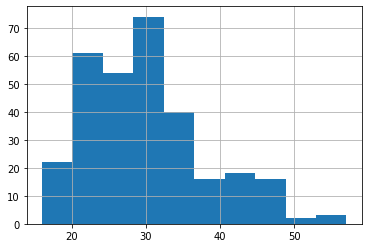

In [113]:
data.Age.hist()

# Finding all artists who mention Canada in the first 250 characters of the biography, to represent artists from Canada

In [109]:
c.execute("""SELECT artist FROM Bios 
WHERE (substr(bio, '%', 250)) LIKE '%Canad%';""")
data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,artist
0,Justin Bieber
1,Avril Lavigne
2,Carly Rae Jepsen
3,Drake
4,MAGIC!
5,The Weeknd
6,Shawn Mendes
7,Alessia Cara
8,Nelly Furtado
